In [110]:
%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()
sns.set_context("poster")
sns.set_palette("colorblind", 8)


In [111]:
df = pd.read_excel('../data/planilha tb pleural 3.xls').replace([99], [None])


# Separação entre TB e Não-TB

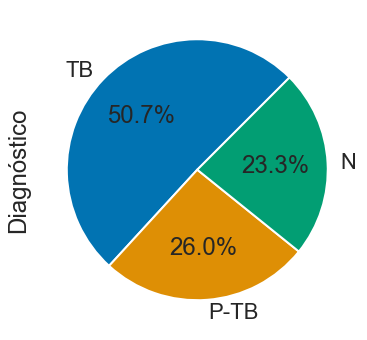

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))


# Filter ignored
df.drop(df[df['Diagnóstico'].isin(['IG'])].index, inplace=True)


df['Diagnóstico'].value_counts().plot(kind='pie',
                                   autopct='%1.1f%%', 
                                   startangle=45,
                                   ax=ax)

closure = (df['Diagnóstico'].isin(['P-TB', 'TB'])).map(lambda x: int(x) * 2. - 1 )


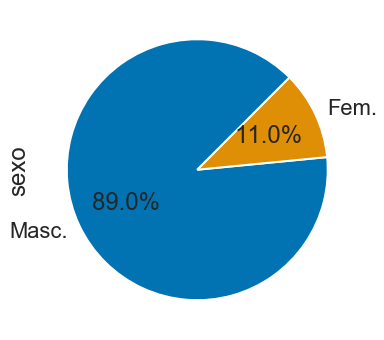

In [113]:
ax= df['sexo'].value_counts().plot(kind='pie',
                                   autopct='%1.1f%%', labels=['Masc.', 'Fem.'],
                                   startangle=45, figsize=(6, 6))



In [114]:
df.shape

(73, 116)

In [133]:
df.columns.tolist()

['Nome',
 'data nasc',
 'idade',
 'sexo',
 'est civil',
 'estuda',
 'escolaridade',
 'emprego',
 'hcw',
 'trabalho',
 'renda',
 'renda ant',
 'inst chef',
 'asp pó ',
 'carro ',
 'banheiro',
 'Emp mens',
 'freezer',
 'geladeira ',
 'gel simples',
 'maquina',
 'radio',
 'tv',
 'video',
 'pontos sib',
 'classe ib',
 'nat',
 'bairro',
 'municip',
 'estado',
 'tempo mor',
 'mora ant',
 'pessoas',
 'comodos',
 'dorm',
 'mo rua',
 'asilo',
 'preso',
 'tabagismo',
 'inalafum',
 'carga tab',
 'drogas',
 'bebe pref',
 'tem fac',
 'dim bebe',
 'crit bebe',
 'bebe man',
 'sent culpa',
 'morou tb',
 'horas tb',
 'tb fam',
 'tb amig',
 'cont tba',
 'tempo',
 'carga tab.1',
 'teve tb',
 'data diag',
 'tratou',
 'desfech tb',
 'bcg',
 'internad',
 'comorb',
 'transpl',
 'corimun',
 'diabetes',
 'sarcoidose',
 'silicose',
 'gastrec',
 'rcu',
 'hep croni',
 'irc',
 'cancerle',
 'hiv aids',
 'dpoc',
 'tosse',
 'espect',
 'hemoptise',
 'eschemo',
 'dor ',
 'febre',
 'suor',
 'hipor',
 'emagrec',
 'asteni

## Variáveis usadas



In [185]:
exams = [
    'citometria',
    'proteina',
    'razaoptn',
    'baarliquid',
    'amres',
    'ada',
    'probtb2',
    'cult',
    'histopat',
    'tipi',
    'sorologia',
    'pcr',
    'probtb3',
    'desfech tb', 
    'bcg',
    'rx',
    'asspulm',
    'outalt',
    'pt',
    'dif cit'
]

ignore_tests = [
    'baar1',
    'cruzes',
    'baar2',
    'cruzes.1',  
]

ignore_columns = [
    'carga tab',
    'carga tab.1',
    "Nome",
    "data nasc",
    "nat",
    "bairro", "municip", "estado",
    'data diag', "Diagnóstico", "classe ib"

]

social_data_columns = [
    "asp pó ", 
    "carro ", 
    "banheiro",
    "freezer",
    "geladeira ",
    "gel simples",
    "maquina",
    "radio",
    "tv",
    "video",
    "pessoas",
    "comodos",
    "dorm",
    "mo rua",
    "preso"
]

personal_data_columns = [
"idade",
"sexo",
"est civil",
"estuda",
"escolaridade",
"emprego",
"hcw",
"trabalho",
"renda",
"renda ant",
"inst chef",
"asp pó ",
"carro ",
"banheiro",
"Emp mens",
"freezer",
"geladeira ",
"gel",
"maquina",
"radio",
"tv",
"video",
"pontos sib",
"classe ib",
"nat",
"bairro",
"municip",
"estado",
"tempo mor",
"mora ant",
"pessoas",
"comodos",
"dorm",
"mo rua",
"asilo",
"preso",
]

alcoholism = [
    "tem fac",
    "dim bebe",
    "crit bebe",
    "bebe man",
    "sent culpa"]

ignore_others = [
    "examefis", "prob1", "ristbmr", "cont tba", "inalafum", "tempo", "horas tb", "tratou", "tempo mor", ""
]

is_alcoholic =  (df[alcoholism] == 1).sum(axis=1) >= 2
is_alcoholic = is_alcoholic.apply(lambda x : 2 * x - 1)
alcoholism += ['bebe pref']


database = df.loc[:, ~df.columns.isin(ignore_columns +
                                      ignore_tests +
                                      alcoholism +
                                      ignore_others) ].copy()
database.loc[:, 'alcoolatra'] = is_alcoholic

database = database.astype('float')

In [186]:
print(', '.join(database.columns.sort_values().tolist()))

Emp mens, ada, alcoolatra, amres, antihiv, asilo, asp pó , asspulm, astenia, baarliquid, banheiro, bcg, cancerle, carro , chiado, citometria, comodos, comorb, corimun, cult, desfech tb, diabetes, dif cit, dispneia, dor , dorm, dpoc, drogas, emagrec, emprego, eschemo, escolaridade, espect, est civil, estuda, febre, freezer, ganglio, gastrec, gel simples, geladeira , hcw, hemoptise, hep croni, hipor, histopat, hiv aids, idade, inst chef, internad, irc, maquina, mo rua, mora ant, morou tb, outalt, pcr, peso10, pessoas, pontos sib, preso, probtb2, probtb3, proteina, pt, radio, razaoptn, rcu, renda, renda ant, rouquidao, rx, sarcoidose, sexo, silicose, sorologia, suor, tabagismo, tb amig, tb fam, teve tb, tipi, tosse, trabalho, transpl, tv, video


Text(0, 0.5, 'Dados Faltantes (%)')

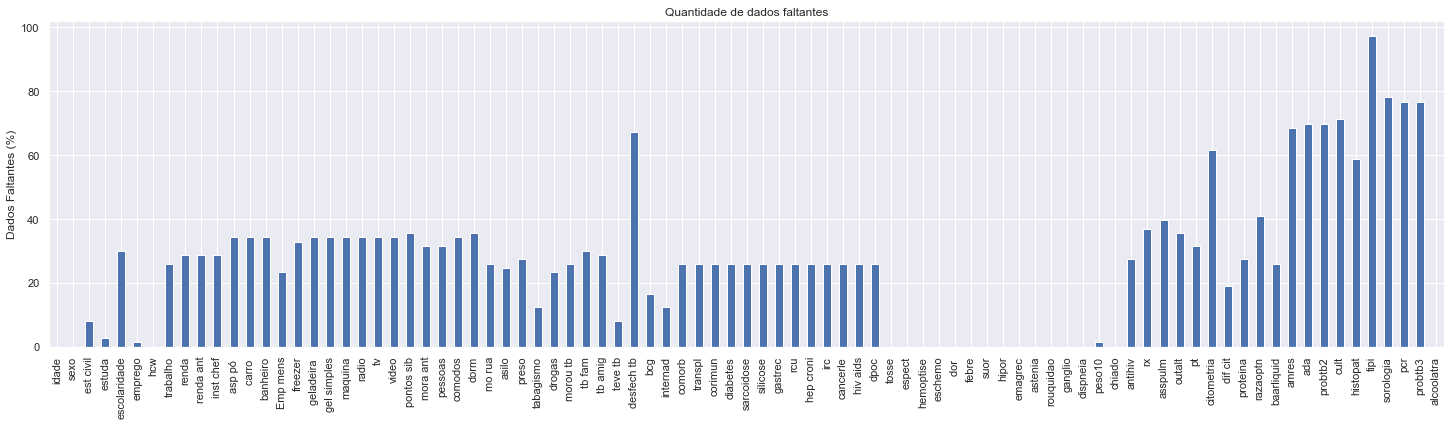

In [187]:
sns.set()
fig, ax = plt.subplots(1, 1, figsize=(25, 6))

ax = ((database.isnull().sum() / database.index.size) * 100).plot(kind='bar')
ax.set_title('Quantidade de dados faltantes')
ax.set_ylabel('Dados Faltantes (%)')

# Imputação Mútua de dados

In [188]:
from statsmodels.imputation.mice import MICEData

In [189]:
imp = MICEData(database, k_pmm=5)

In [190]:
imp.data

idade  sexo  est civil  estuda  escolaridade  emprego  hcw  trabalho  \
0    40.0   1.0        1.0     2.0           2.0      3.0  2.0       2.0   
1    32.0   1.0        1.0     2.0           4.0      1.0  1.0       6.0   
2    56.0   1.0        1.0     2.0           2.0      2.0  2.0       0.0   
3    60.0   1.0        1.0     2.0           3.0      1.0  2.0       3.0   
4    44.0   1.0        1.0     2.0           3.0      7.0  2.0       0.0   
5    75.0   1.0        2.0     2.0           3.0      1.0  2.0       2.0   
6    52.0   1.0        2.0     2.0           4.0      1.0  2.0       7.0   
7    34.0   1.0        1.0     2.0           3.0      3.0  2.0       2.0   
8    38.0   1.0        1.0     2.0           3.0      3.0  2.0       2.0   
9    44.0   1.0        1.0     1.0           3.0      4.0  2.0       1.0   
10   39.0   1.0        2.0     2.0           5.0      3.0  2.0       5.0   
11   36.0   1.0        2.0     2.0           5.0      3.0  2.0       2.0   
12   38.0   2.0        1.0     2.0           5.0      2.0  2.0       0.0   
13   26.0   1.0        1.0     2.0           5.0      2.0  2.0       0.0   
14   63.0   1.0        2.0     2.0           2.0      2.0  2.0       5.0   
15   28.0   1.0        2.0     2.0           2.0      4.0  2.0       0.0   
16   18.0   1.0        1.0     2.0           2.0      2.0  1.0       2.0   
17   30.0   1.0        1.0     2.0           5.0      1.0  2.0       1.0   
18   45.0   1.0        1.0     2.0           5.0      3.0  2.0       2.0   
19   56.0   1.0        2.0     2.0           2.0      1.0  2.0       0.0   
20   69.0   1.0        2.0     2.0           3.0      1.0  2.0       3.0   
21   21.0   2.0        1.0     1.0           6.0      1.0  1.0       2.0   
22   57.0   1.0        2.0     2.0           3.0      2.0  2.0       1.0   
23   25.0   2.0        1.0     2.0           3.0      1.0  2.0       2.0   
24   50.0   1.0        2.0     2.0           2.0      3.0  2.0       5.0   
25   81.0   1.0        2.0     2.0           2.0      7.0  2.0       0.0   
26   18.0   1.0        1.0     2.0           2.0      1.0  2.0       5.0   
27   51.0   1.0        1.0     1.0           3.0      7.0  2.0       5.0   
28   41.0   2.0        2.0     2.0           2.0      1.0  2.0       0.0   
29   73.0   1.0        2.0     2.0           3.0      2.0  2.0       1.0   
..    ...   ...        ...     ...           ...      ...  ...       ...   
43   39.0   1.0        1.0     2.0           2.0      2.0  2.0       3.0   
44   62.0   1.0        2.0     2.0           2.0      1.0  2.0       2.0   
45   25.0   1.0        1.0     2.0           3.0      1.0  2.0       3.0   
46   89.0   1.0        1.0     2.0           2.0      1.0  2.0       3.0   
47   47.0   1.0        1.0     2.0           2.0      6.0  2.0       3.0   
48   74.0   1.0        1.0     2.0           5.0      7.0  2.0       2.0   
49   62.0   1.0        2.0     2.0           5.0      1.0  2.0       3.0   
50   32.0   1.0        1.0     2.0           4.0      1.0  2.0       0.0   
51   53.0   1.0        1.0     2.0           3.0      1.0  2.0       0.0   
52   42.0   1.0        1.0     2.0           4.0      3.0  2.0       3.0   
53   63.0   1.0        2.0     2.0           2.0      8.0  2.0       0.0   
54   69.0   1.0        2.0     2.0           5.0      7.0  2.0       1.0   
55   48.0   2.0        1.0     2.0           2.0      3.0  2.0       2.0   
56   37.0   1.0        2.0     2.0           2.0      1.0  2.0       2.0   
57   40.0   1.0        1.0     2.0           3.0      3.0  2.0       2.0   
58   28.0   1.0        3.0     2.0           3.0      3.0  2.0       2.0   
59   56.0   1.0        3.0     2.0           3.0      1.0  2.0       2.0   
60   71.0   1.0        3.0     2.0           3.0      3.0  2.0       2.0   
61   53.0   1.0        3.0     2.0           3.0      3.0  2.0       2.0   
62   24.0   1.0        3.0     2.0           3.0      3.0  2.0       2.0   
63   22.0   1.0        1.0     2.0           3.0    

Text(0.5, 0, 'Variáveis')

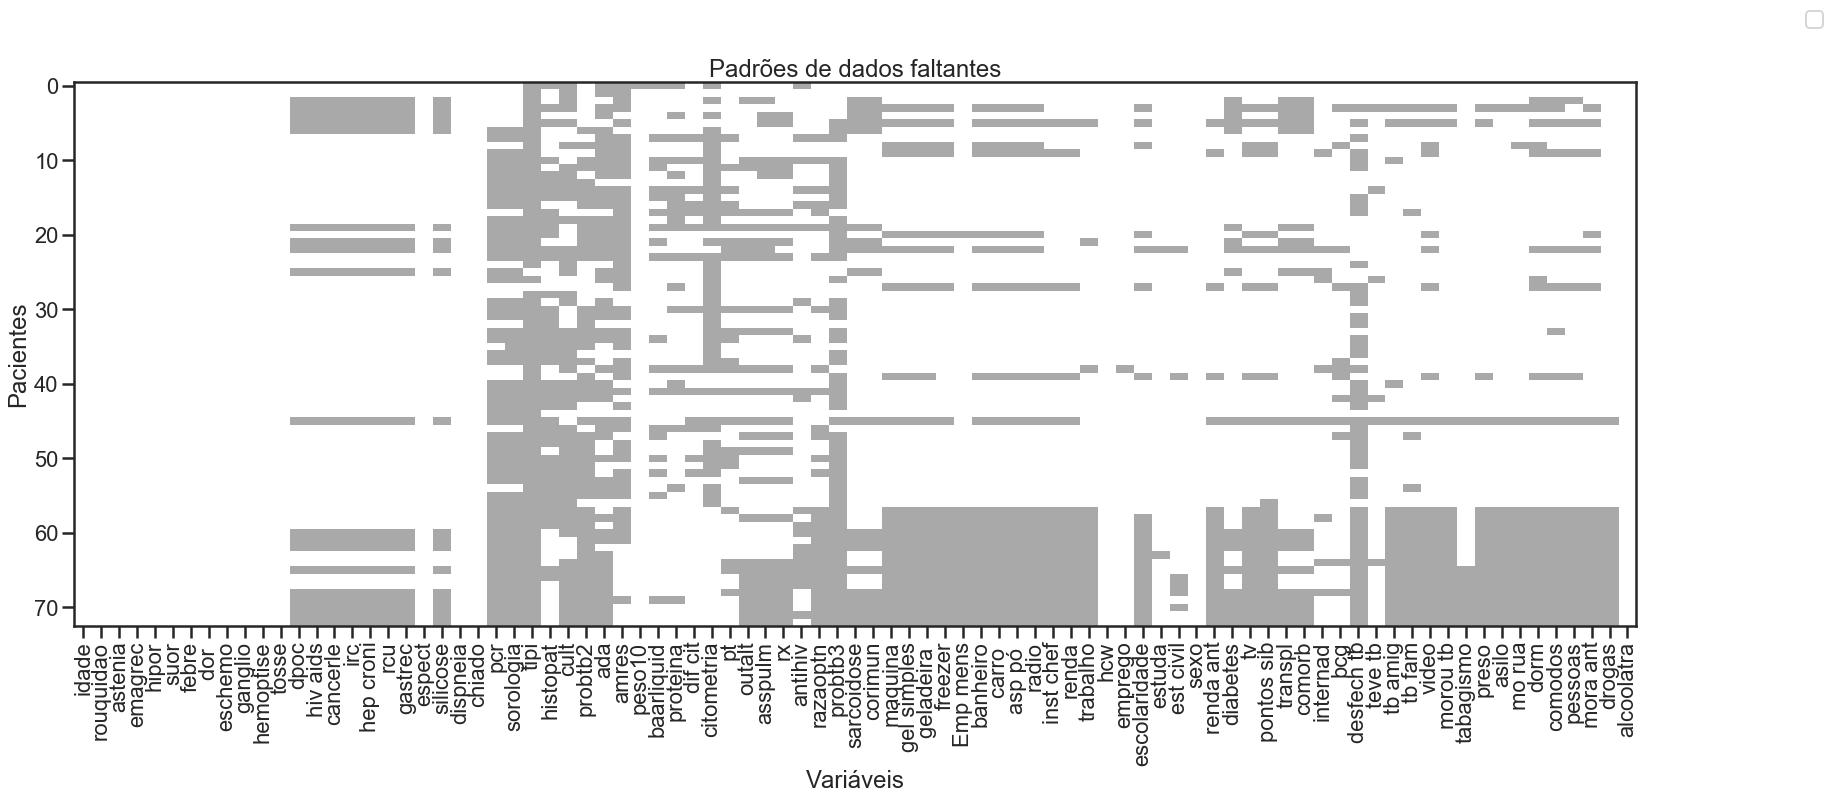

In [191]:
sns.set_style('ticks')
sns.set_context('poster')

fig, ax = plt.subplots(1, 1, figsize=(28, 10))
imp.plot_missing_pattern(ax=ax, row_order='raw', color_row_patterns=False)
ha, la = ax.get_legend_handles_labels()
pad = 0.5
leg = fig.legend(ha, la,
                 handletextpad=pad)
ax.set_title('Padrões de dados faltantes')
ax.set_ylabel('Pacientes')
ax.set_xlabel(u'Variáveis')

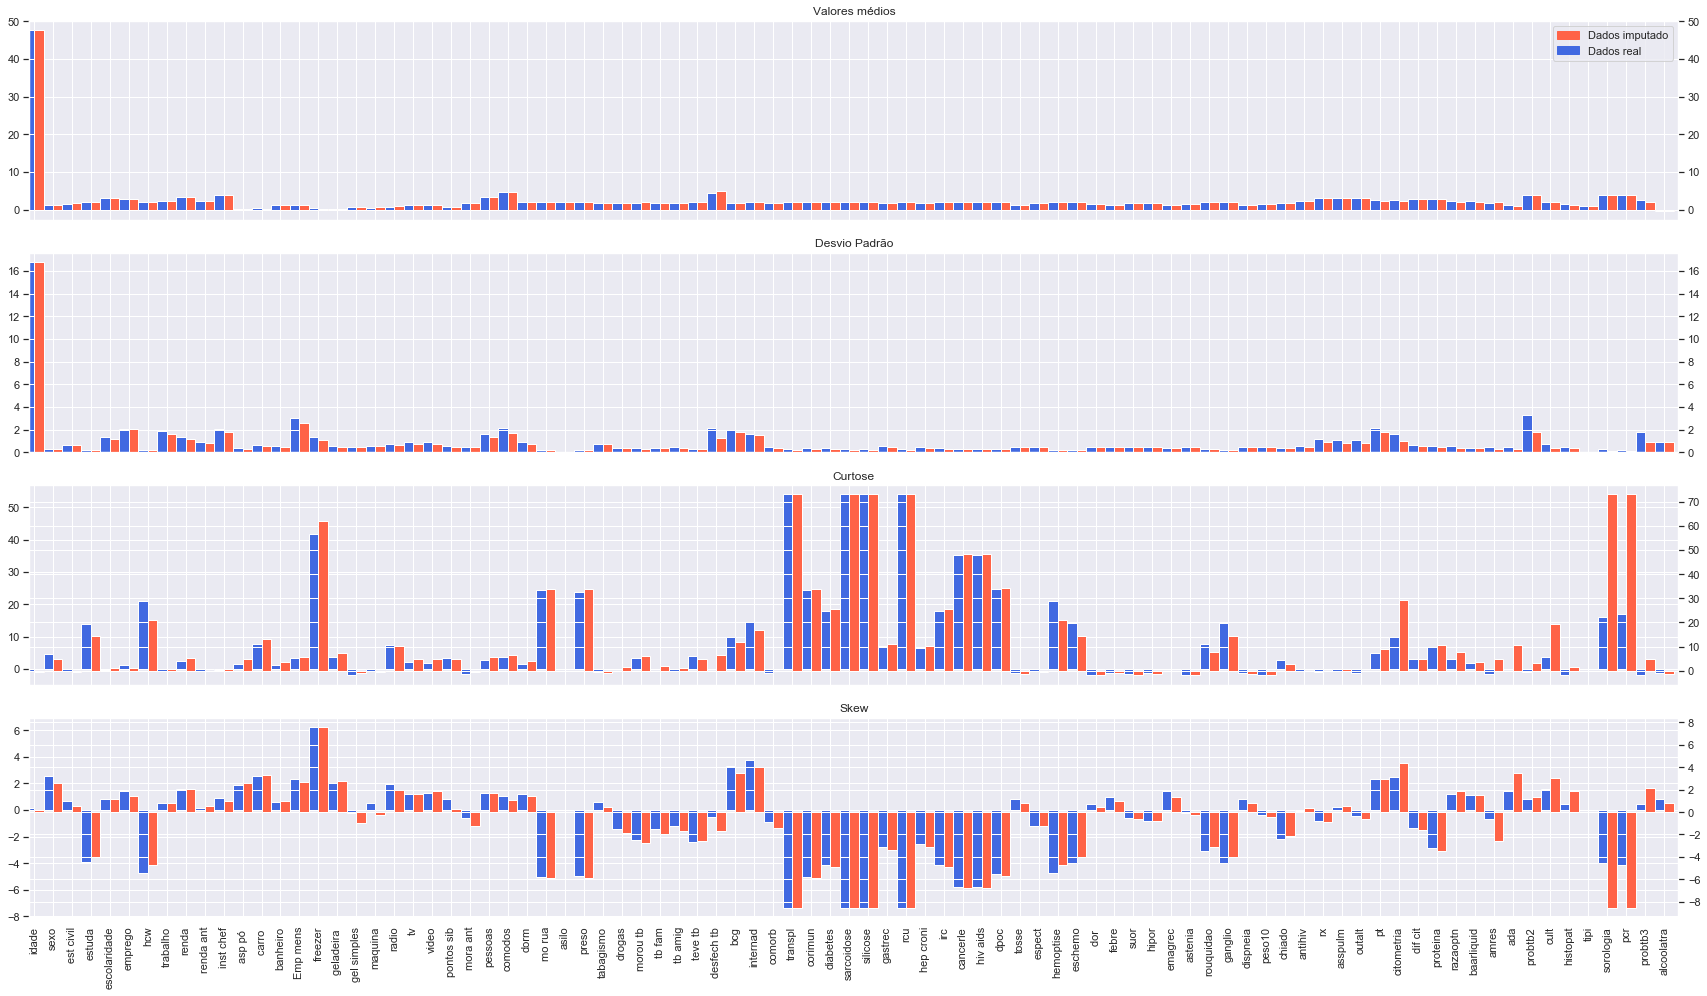

In [192]:
import matplotlib.patches as mpatches

sns.set()
fig, axes = plt.subplots(4, 1, figsize=(24, 14))

ax = axes[0]
database.mean().plot(kind='bar',color='royalblue', ax=ax, position=1)
ax2 = ax.twinx() 
imp.data.mean().plot(kind='bar', color='tomato', ax=ax2, position=0)
ax.set_title('Valores médios')

re = mpatches.Patch(color='tomato', label='Dados imputado')
im = mpatches.Patch(color='royalblue', label='Dados real')

plt.legend(handles=[re,im], loc=0)

ax = axes[1]
database.std().plot(kind='bar',color='royalblue', ax=ax, position=1)
ax2 = ax.twinx() 
imp.data.std().plot(kind='bar', color='tomato', ax=ax2, position=0)
ax.set_title('Desvio Padrão')

ax = axes[2]
ax.set_title('Curtose')

database.kurtosis().plot(kind='bar',color='royalblue', ax=ax, position=1)
ax2 = ax.twinx() 
imp.data.kurtosis().plot(kind='bar', color='tomato', ax=ax2, position=0)

ax = axes[3]
ax.set_title('Skew')

database.skew().plot(kind='bar',color='royalblue', ax=ax, position=1)
ax2 = ax.twinx() 
imp.data.skew().plot(kind='bar', color='tomato', ax=ax2, position=0)


fig.tight_layout()

In [193]:
closure = (df['Diagnóstico'].isin(['P-TB', 'TB'])).map(lambda x: int(x) * 2. - 1 )

# Esferização dos dados

In [194]:
from sklearn.preprocessing import StandardScaler

data_normalized = StandardScaler().fit_transform(imp.data)

In [195]:
export_data = {}
df_normalized = pd.DataFrame(data_normalized,
                             columns=database.columns,
                             index=database.index)
export_data['normalized'] = df_normalized
export_data['output'] = closure

In [196]:
import _pickle as pkl

pkl.dump(export_data, open('data_preprocessed.pickle', "wb"))

# Multi-factorial Analysis

In [197]:
import prince

In [198]:
mfa = prince.PCA(
    n_components=df_normalized.columns.values.shape[0],
    n_iter=100)
mfa = mfa.fit(df_normalized)

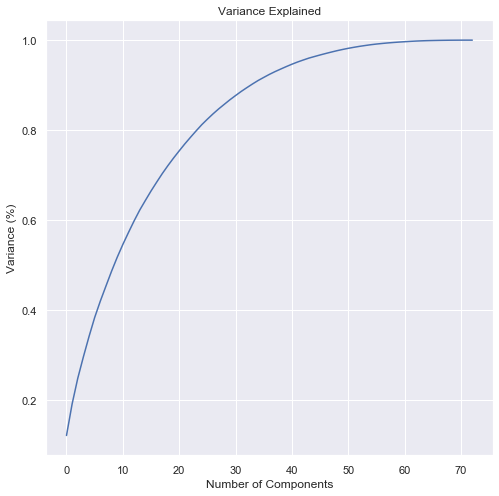

In [199]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(np.cumsum(mfa.explained_inertia_))
ax.set_title("Variance Explained")
ax.set_ylabel('Variance (%)')
ax.set_xlabel('Number of Components')
ax.grid()
ax.grid(True)

In [200]:

mfa = prince.PCA(
    n_components=20,
    n_iter=100,
    engine='auto'
)
mfa = mfa.fit(df_normalized)

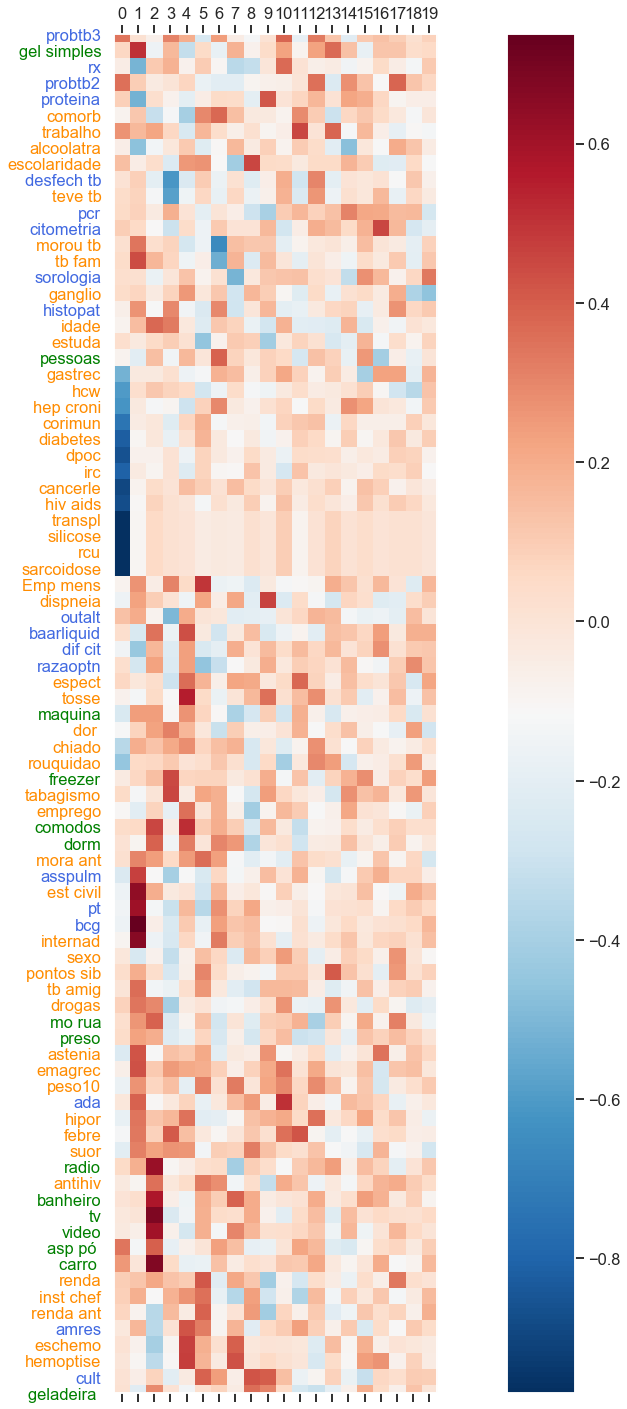

In [201]:
import scipy.cluster.hierarchy as sch

sns.set('talk')
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
var_corrs = mfa.column_correlations(df_normalized)
var_corrs.dropna(inplace=True)
linkage = sch.linkage(var_corrs, method='centroid')
dendogram = sch.dendrogram(linkage, orientation='right', no_plot=True)
index = dendogram['leaves']
var_corrs = var_corrs.iloc[index, :]

cax = ax.matshow(var_corrs, cmap=plt.cm.RdBu_r)
plt.colorbar(cax)
ax.set_yticks(np.arange(len(var_corrs.index.values)))
ax.set_yticklabels(var_corrs.index.values)
ax.set_xticks(np.arange(len(var_corrs.columns.values)))

for tick in ax.yaxis.get_ticklabels():
    if tick.get_text() in social_data_columns:
        tick.set_color('green')
        tick.set_text(tick.get_text() + ' a')
    else:
        if tick.get_text() in exams:
            tick.set_color('royalblue')
        else:
            tick.set_color('darkorange')
ax.grid(False)

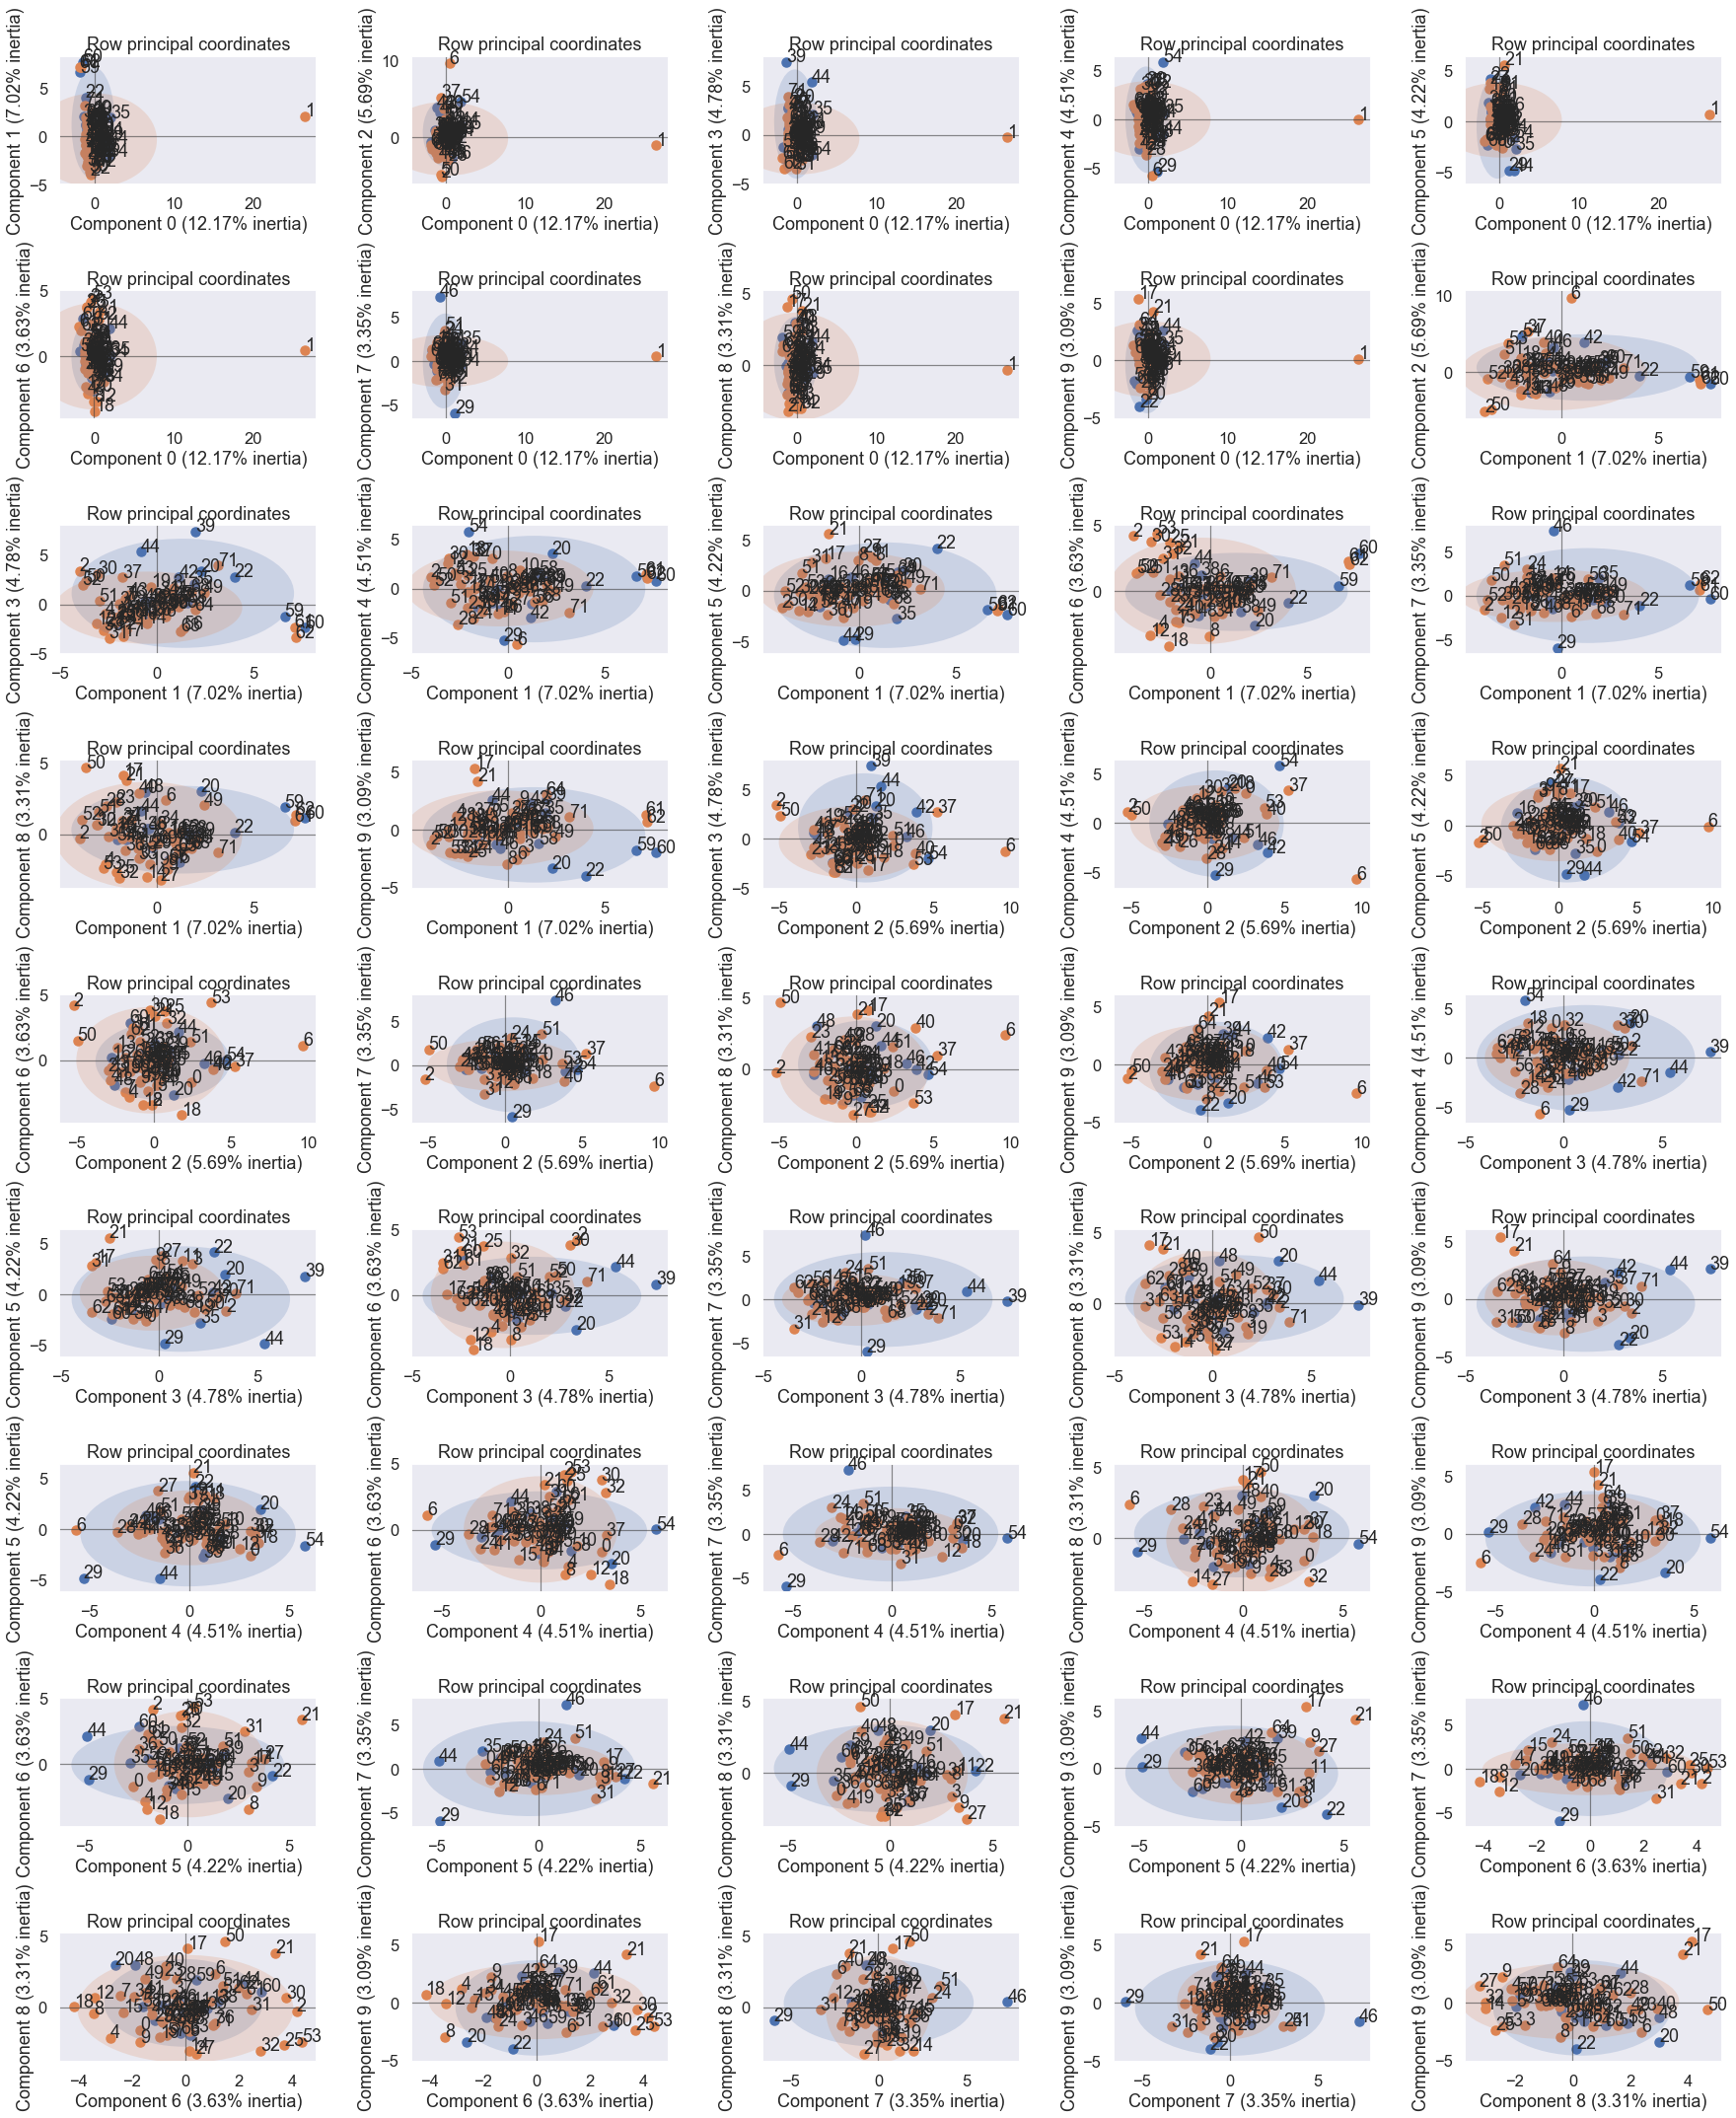

In [202]:
import itertools

fig, axes = plt.subplots(9, 5, figsize=(25, 30))
axes_flatten = axes.ravel()
len(list(itertools.combinations(range(10), 2)))

for idx, comb in enumerate(itertools.combinations(range(10), 2)):
    mfa.plot_row_coordinates(
        df_normalized,
        ax=axes_flatten[idx],
        x_component=comb[0],
        y_component=comb[1],
        color_labels = [{-1: 'Non-TB', 1: 'TB'}[c] for c in closure],
        labels=imp.data.index,
        ellipse_outline=False,
        ellipse_fill=True,
        show_points=True)
    axes_flatten[idx].get_legend().remove()

    
fig.tight_layout()

# Correlação entre variáveis

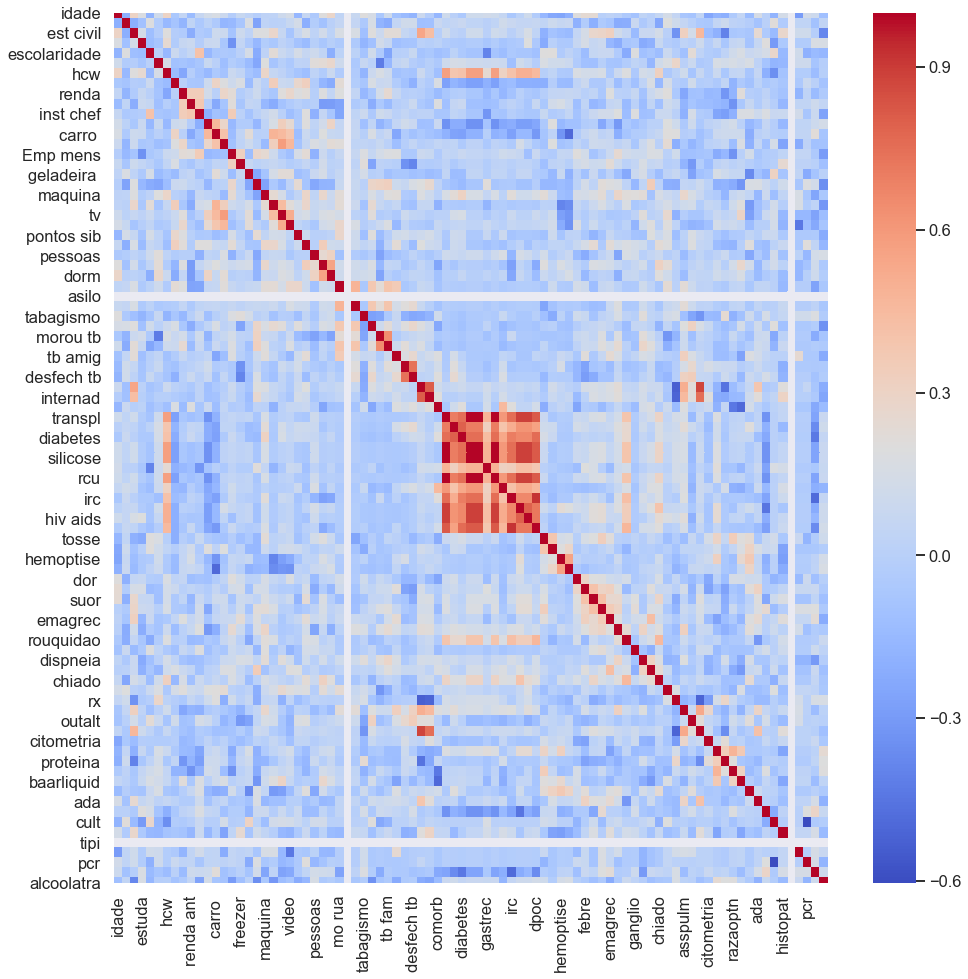

In [203]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
sns.heatmap(df_normalized.corr(),
            ax=ax, annot=False,  cmap="coolwarm", fmt='.1f')


In [204]:

from pyitlib import discrete_random_variable as drv

mi = drv.information_mutual_normalised

/Users/fguimara/.pyenv/versions/3.7.2/envs/pleuraltb/lib/python3.7/site-packages/pyitlib/discrete_random_variable.py:2100: RuntimeWarning: invalid value encountered in true_divide
  I = I / C


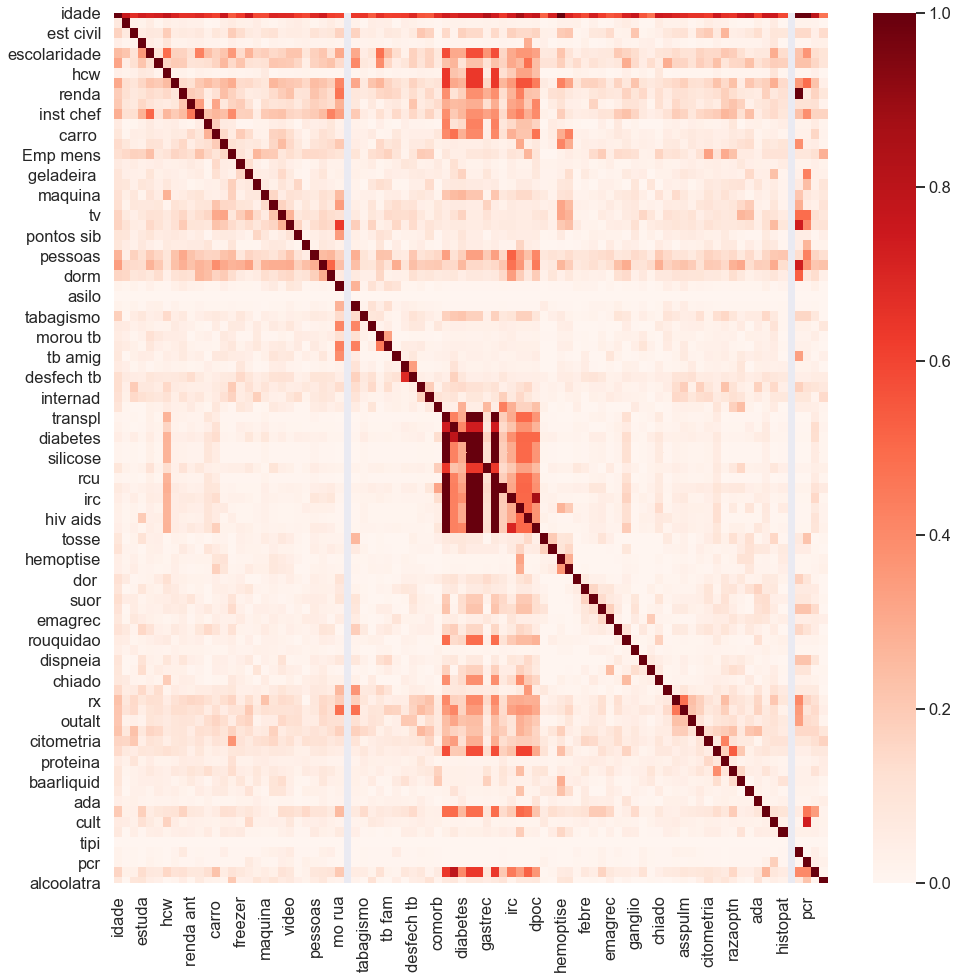

In [205]:
mi_data = df_normalized


fig, ax = plt.subplots(1, 1, figsize=(16, 16))
sns.heatmap(pd.DataFrame(mi(mi_data.T), index=mi_data.columns, columns=mi_data.columns),
            ax=ax, annot=False,  cmap="Reds", fmt='.2f')


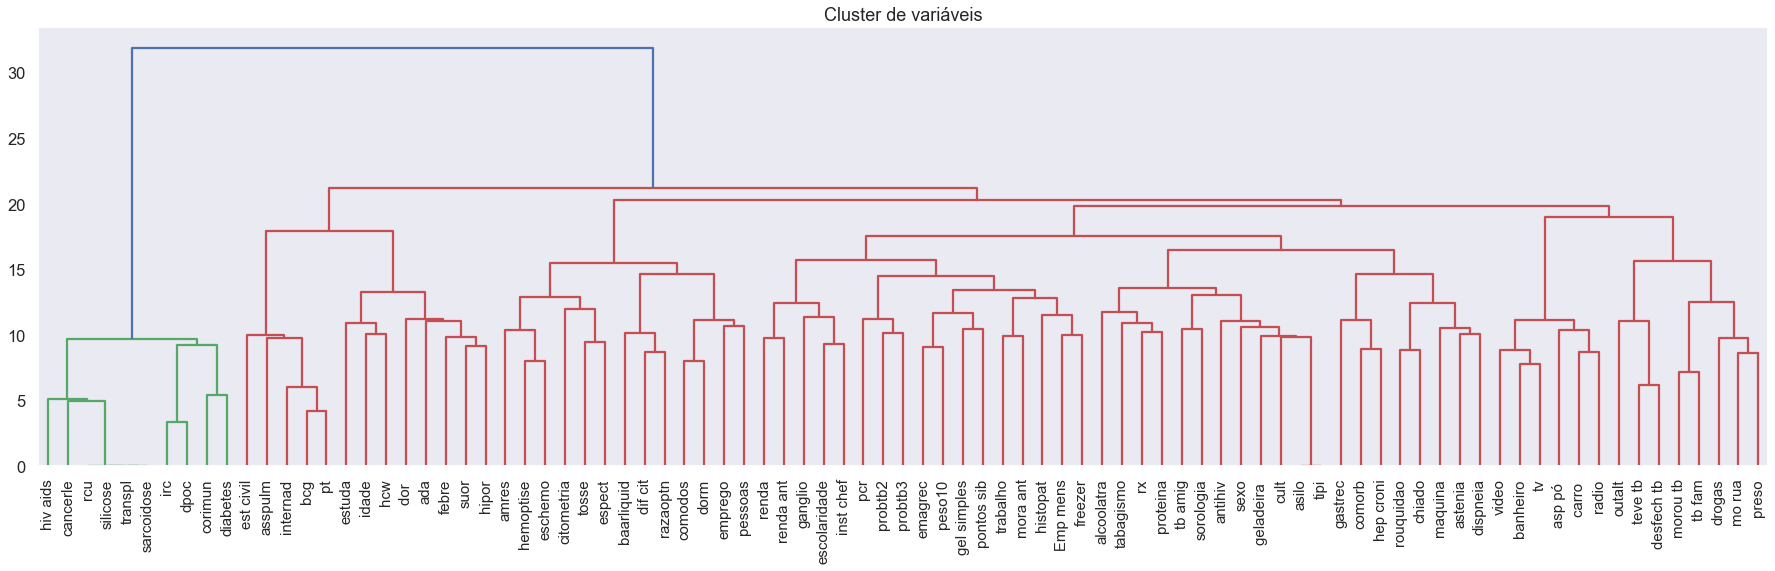

In [206]:
from scipy.cluster.hierarchy import dendrogram, linkage
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(25, 8))
linkage_matrix = linkage(df_normalized.T, 'ward')
dendrogram(
    linkage_matrix,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
    ax=ax
);

varnames = df_normalized.columns.to_list()
ticklabels = [varnames[int(tick.get_text())] for tick in ax.xaxis.get_ticklabels()]
ax.set_xticklabels(ticklabels)
fig.tight_layout()

ax.set_title('Cluster de variáveis');

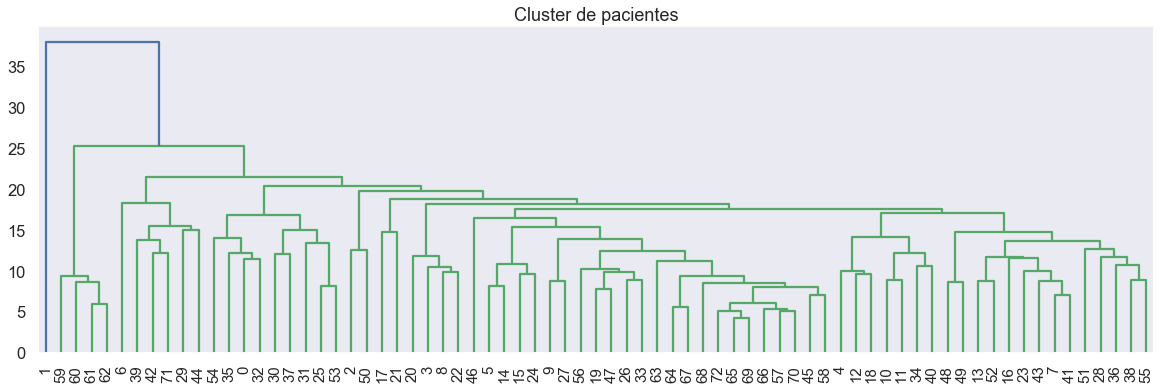

In [207]:
sns.set_style("dark")

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
linkage_matrix = linkage(df_normalized, 'ward')
dendrogram(
    linkage_matrix,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
    ax=ax
);


# Natural counting
ticklabels = [int(tick.get_text()) for tick in ax.xaxis.get_ticklabels()]
ax.set_xticklabels(ticklabels)
        
ax.set_title('Cluster de pacientes');

In [213]:
df_norm_social  = df_normalized[social_data_columns]
df_norm_social.loc[:, 'diagnostico'] = closure.tolist()

df_norm_social.to_pickle('df_norm_social.pkl')

In [214]:
df_norm_exams  = df_normalized[exams]
df_norm_exams.loc[:, 'diagnostico'] = closure.tolist()
df_norm_exams.to_pickle('df_norm_exams.pkl')

In [215]:
df_norm_personal = df_normalized[df_normalized.columns[~df_normalized.columns.isin(exams + social_data_columns)]]
df_norm_personal.loc[:, 'diagnostico'] = closure.tolist()
df_norm_personal.to_pickle('df_norm_personal.pkl')